In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/dl_coursework")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
import copy
import utils
import decoder
import trainnet
import wavelet
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
img_path = './test_data/phantom256.png'
img_pil = Image.open(img_path)
img_np = utils.pil_numpy(img_pil)
img_np = img_np / np.max(img_np)
img_tensor = utils.np_tensor(img_np)

print(img_tensor.shape)

torch.Size([1, 1, 256, 256])


In [4]:
# number of output channels
dd_net = decoder.Decoder(k_channels=64, output_channels=1, upsample_times = 4)
print("The number of net parameters is: ", utils.parameters_number(dd_net))
print(dd_net)

The number of net parameters is:  21184
Decoder(
  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
)


In [98]:
best_net, loss_noisy, loss_clean, net_input = trainnet.train_net( net=dd_net,
                        num_epoches=20000,
                        lr=0.005,
                        img_noisy=img_tensor,
                        img_clean=img_tensor,
                        k_channels=64
                        )

tensor(0.1805, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.8708e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.9506e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(2.5601e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.8370e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.3968e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.0695e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.2301e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.6272e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.9309e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.0158e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.1597e-06, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.4386e-06, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

Text(0, 0.5, 'mse')

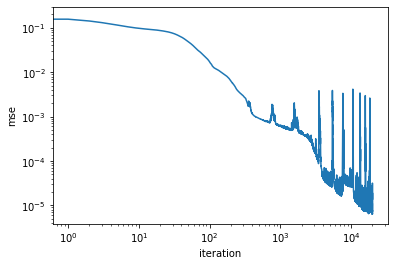

In [99]:
plt.loglog(loss_noisy)
plt.xlabel('iteration')
plt.ylabel('mse')

In [0]:
best_net = best_net.cpu()
net_input = net_input.cpu()

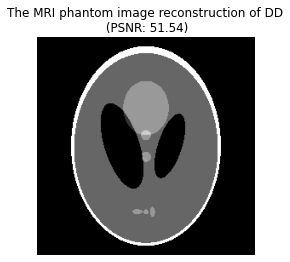

In [101]:
output_image = best_net(net_input).cpu().detach().numpy()[0]

plt.imshow(np.clip(output_image[0],0,1), cmap="gray")
plt.title("The MRI phantom image reconstruction of DD\n (PSNR: %.2f)" % utils.psnr(output_image, img_np))
plt.axis('off')
plt.show()

In [102]:
best_net(net_input)

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.6849e-21,
           2.3307e-15, 2.6476e-11],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.4103e-14,
           4.8025e-09, 7.0967e-08],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.3129e-09,
           2.4096e-07, 1.4013e-05]]]], grad_fn=<SigmoidBackward>)

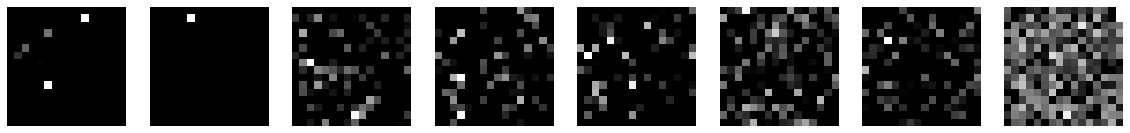

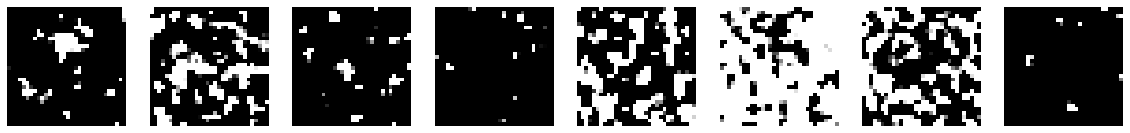

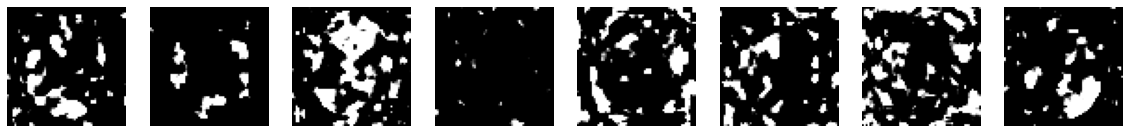

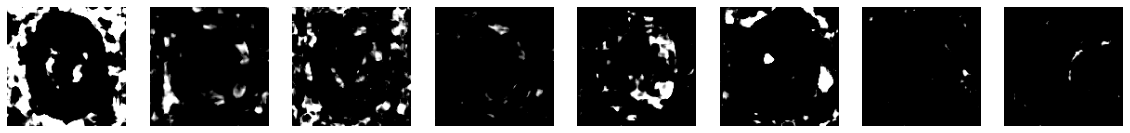

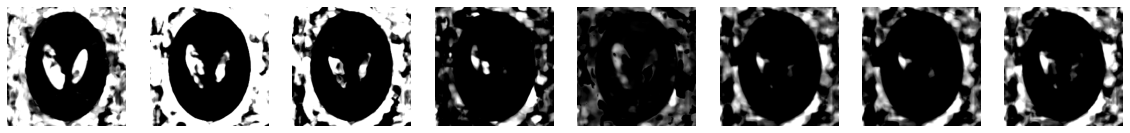

In [104]:
def hook_function(module, grad_in, grad_out):
    fig = plt.figure(figsize=(20,20))
    ax = fig.subplots(1,8)
    for i in range(8):
        conv_output = grad_out.data[0, i]
        ax[i].imshow(np.clip(conv_output, 0,1), cmap="gray")
        ax[i].axis('off')
    
# register the hook
hook1 = best_net.conv1.register_forward_hook(hook_function)
hook2 = best_net.conv2.register_forward_hook(hook_function)
hook3 = best_net.conv3.register_forward_hook(hook_function)
hook4 = best_net.conv4.register_forward_hook(hook_function)
hook5 = best_net.conv5.register_forward_hook(hook_function)

# forward pass
best_net(net_input) 

# remove hook
hook1.remove()
hook2.remove()
hook3.remove()
hook4.remove()
hook5.remove()
plt.savefig('activation_map.png')